# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah "Heart Disease Classification Dataset" yang bersumber dari [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset/data). Dataset ini berisi 14 atribut atau fitur yang berkaitan dengan data rekam medis pasien. Tujuannya adalah untuk melakukan klasifikasi, yaitu memprediksi apakah seorang pasien memiliki risiko penyakit jantung atau tidak berdasarkan atribut-atribut tersebut.

Berikut adalah penjelasan detail untuk setiap kolom/fitur dalam dataset:

* **age**: Menampilkan usia individu dalam tahun.
* **sex**: Menampilkan jenis kelamin individu (1 = laki-laki; 0 = perempuan).
* **cp (Chest-pain type)**: Menampilkan tipe nyeri dada yang dialami:
    * 0 = *Typical Angina*: Nyeri dada yang terkait langsung dengan jantung.
    * 1 = *Atypical Angina*: Nyeri dada yang tidak terlalu terkait dengan jantung.
    * 2 = *Non-anginal Pain*: Nyeri yang bukan disebabkan oleh masalah jantung.
    * 3 = *Asymptomatic*: Tidak ada gejala nyeri dada.
* **trestbps (Resting Blood Pressure)**: Menampilkan tekanan darah istirahat individu dalam satuan mmHg. Nilai di atas 130-140 biasanya menjadi perhatian.
* **chol (Serum Cholestrol)**: Menampilkan kadar kolesterol serum dalam satuan mg/dl.
* **fbs (Fasting Blood Sugar)**: Membandingkan kadar gula darah puasa individu. Jika > 120 mg/dl, nilainya 1 (benar), jika tidak maka 0 (salah).
* **restecg (Resting ECG)**: Menampilkan hasil elektrokardiogram (EKG) saat istirahat:
    * 0 = Normal.
    * 1 = Memiliki kelainan gelombang ST-T.
    * 2 = Menunjukkan kemungkinan hipertrofi ventrikel kiri.
* **thalach (Max heart rate achieved)**: Menampilkan detak jantung maksimum yang dicapai oleh individu saat beraktivitas.
* **exang (Exercise induced angina)**: Menunjukkan apakah individu mengalami angina (nyeri dada) saat berolahraga (1 = ya; 0 = tidak).
* **oldpeak**: Depresi ST yang diinduksi oleh olahraga relatif terhadap saat istirahat.
* **slope**: Kemiringan puncak segmen ST saat latihan:
    * 0 = *Upsloping* (Menanjak): Peningkatan detak jantung yang lebih baik saat berolahraga (jarang terjadi).
    * 1 = *Flat* (Datar): Perubahan minimal (jantung sehat).
    * 2 = *Downsloping* (Menurun): Tanda-tanda jantung yang tidak sehat.
* **ca**: Jumlah pembuluh darah utama (0–3) yang terlihat berwarna saat *flourosopy*.
* **thal**: Hasil tes thalium stress, menunjukkan kelainan darah yang disebut thalassemia:
    * 1, 3 = Normal.
    * 6 = *Fixed defect* (Cacat tetap).
    * 7 = *Reversible defect* (Cacat dapat pulih): Aliran darah tidak lancar saat berolahraga.
* **target**: Variabel target yang menunjukkan apakah individu menderita penyakit jantung atau tidak (1 = ya; 0 = tidak).

# **2. Import Library**

In [1]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
path = kagglehub.dataset_download("sumaiyatasmeem/heart-disease-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.15k/4.15k [00:00<00:00, 4.56MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sumaiyatasmeem/heart-disease-classification-dataset/versions/1


In [3]:
df = pd.read_csv(path + '/heart disease classification dataset.csv', index_col=0)
df.shape

(303, 14)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## eda


In [4]:
print("\n--- A. Inspeksi Awal Data ---")
print("\n1. Lima baris pertama dataset:")
df.head()


--- A. Inspeksi Awal Data ---

1. Lima baris pertama dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [5]:
print("\n\n2. Informasi dasar dan tipe data:")
df.info()



2. Informasi dasar dan tipe data:
<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 35.5+ KB


In [6]:
print("\n\n3. Deskripsi statistik untuk fitur numerik:")
df.describe()



3. Deskripsi statistik untuk fitur numerik:


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [7]:
print(df.duplicated().sum())

1


In [8]:
print("\n\n4. Pengecekan jumlah nilai yang hilang (missing values):")
df.isna().sum()



4. Pengecekan jumlah nilai yang hilang (missing values):


,0
age,0
sex,0
cp,0
trestbps,4
chol,1
fbs,0
restecg,0
thalach,5
exang,0
oldpeak,0




--- B. Analisis Univariat ---

1. Distribusi Fitur Numerik:


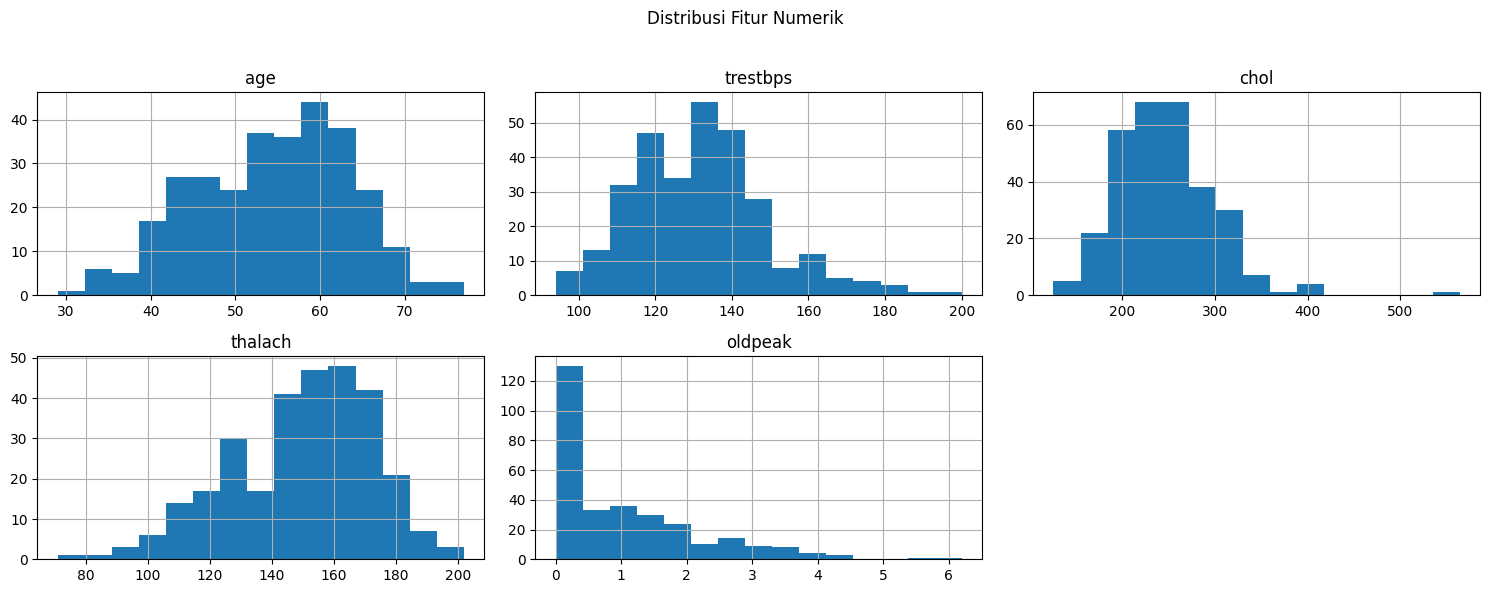

In [9]:
print("\n\n--- B. Analisis Univariat ---")

print("\n1. Distribusi Fitur Numerik:")
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Distribusi Fitur Kategorikal:


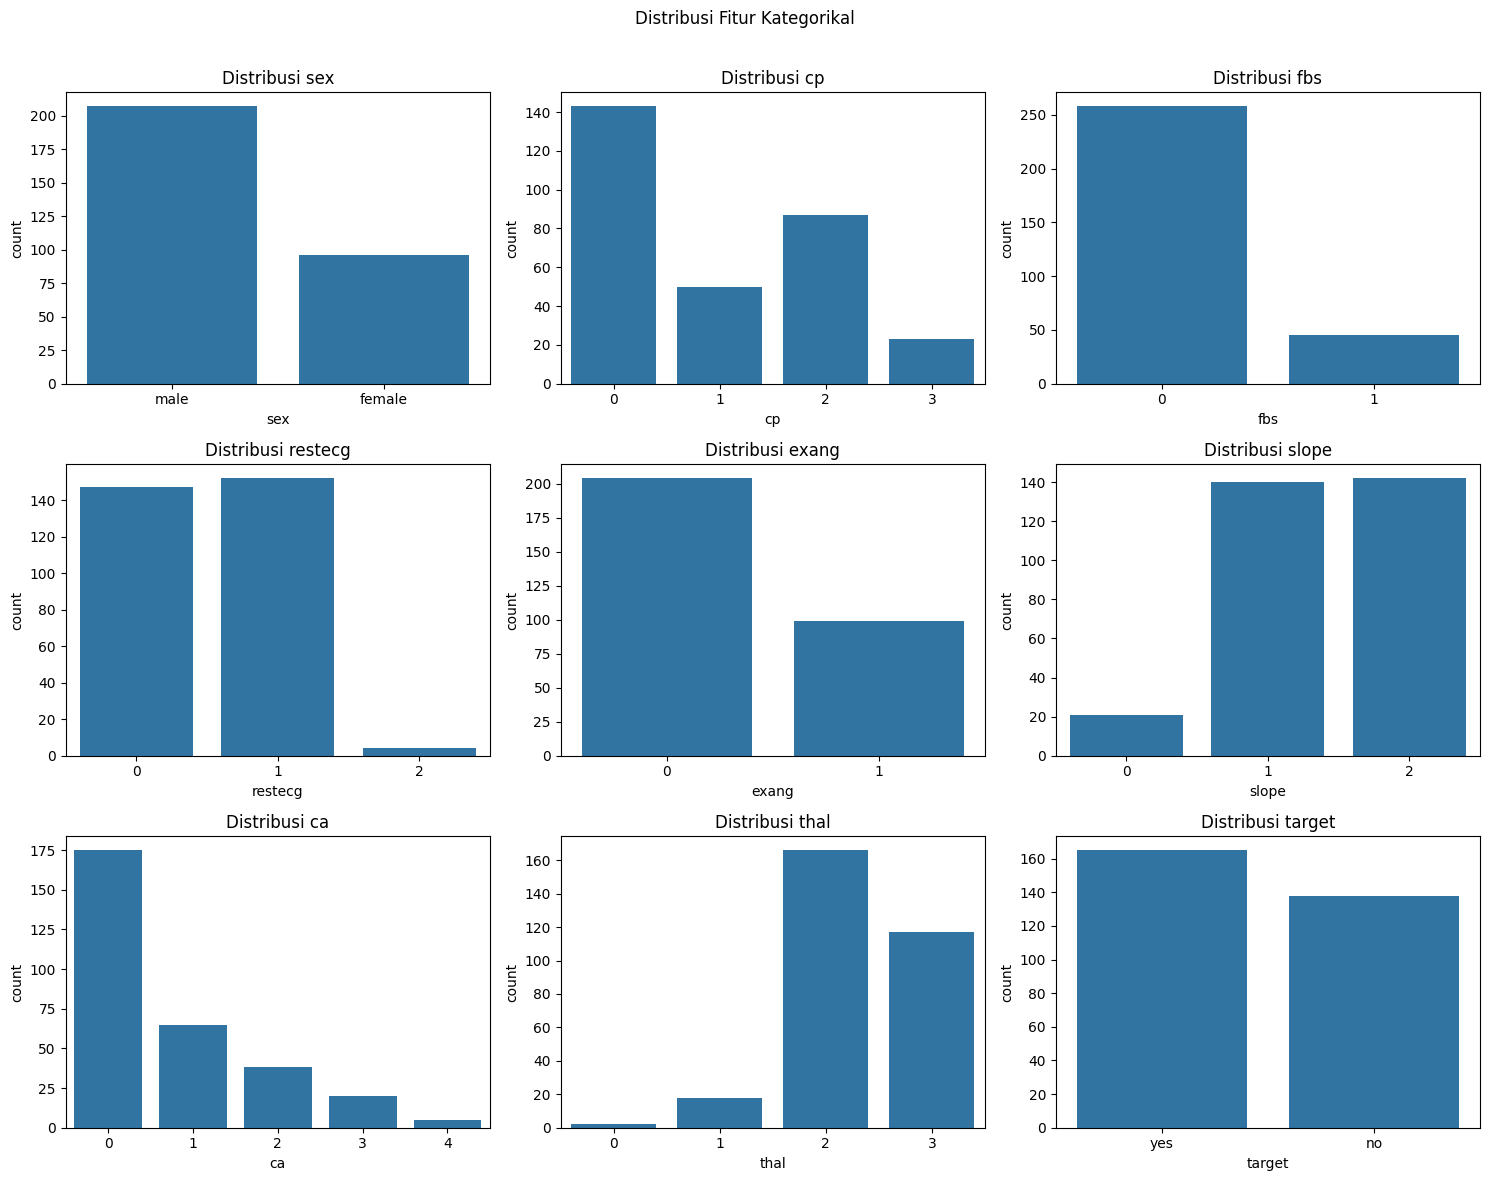

In [10]:
print("\n2. Distribusi Fitur Kategorikal:")
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.suptitle('Distribusi Fitur Kategorikal')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



--- C. Analisis Bivariat (Hubungan Fitur dengan Target) ---

1. Hubungan Fitur Kategorikal dengan Target:


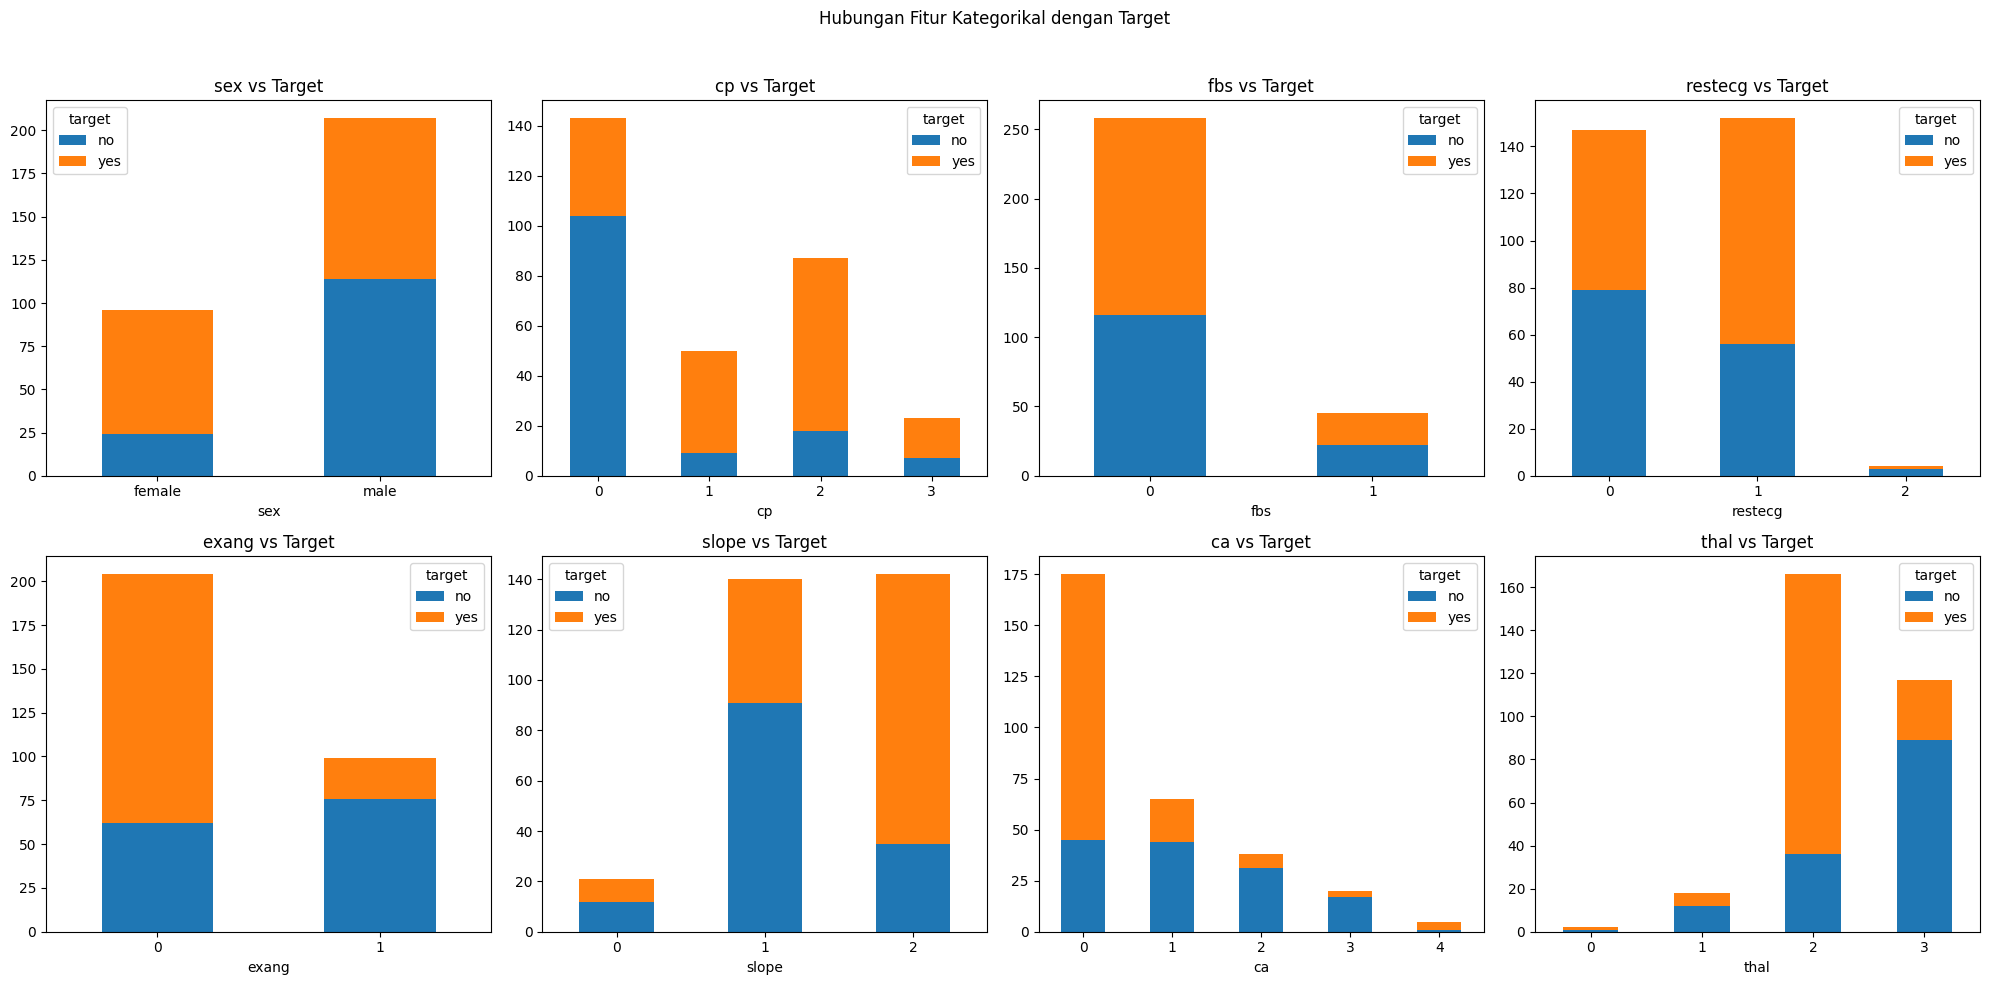

In [11]:
print("\n\n--- C. Analisis Bivariat (Hubungan Fitur dengan Target) ---")

print("\n1. Hubungan Fitur Kategorikal dengan Target:")
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

categorical_features_no_target = [col for col in categorical_features if col != 'target']

for i, col in enumerate(categorical_features_no_target):
    pd.crosstab(df[col], df['target']).plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{col} vs Target')
    axes[i].tick_params(axis='x', rotation=0)

plt.suptitle('Hubungan Fitur Kategorikal dengan Target')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Hubungan Fitur Numerik dengan Target:


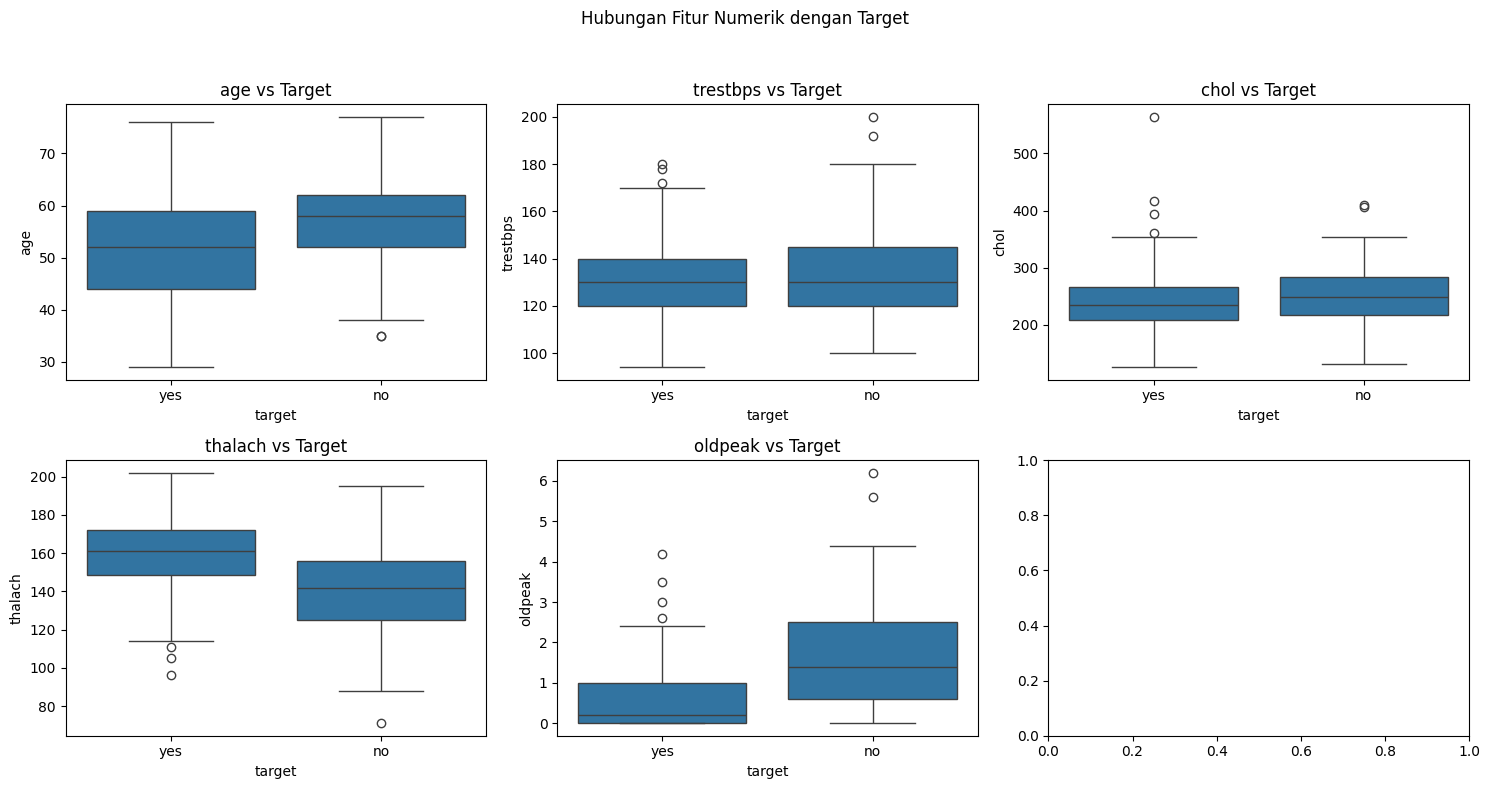

In [12]:
print("\n2. Hubungan Fitur Numerik dengan Target:")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    sns.boxplot(x='target', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Target')

plt.suptitle('Hubungan Fitur Numerik dengan Target')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
df_processed = df.copy()

1. Menangani Data Duplikat


In [14]:
df_processed.drop_duplicates(inplace=True)
print(f"Bentuk data setelah menghapus duplikat: {df_processed.shape}")

Bentuk data setelah menghapus duplikat: (302, 14)


2. Menangani Missing Values

  Menggunakan SimpleImputer dengan strategi 'median' karena lebih tahan terhadap outlier
  Kolom yang akan diimputasi: trestbps, chol, thalach


In [15]:
imputer = SimpleImputer(strategy='median')
numerical_cols_with_missing = ['trestbps', 'chol', 'thalach']
df_processed[numerical_cols_with_missing] = imputer.fit_transform(df_processed[numerical_cols_with_missing])

print("\nJumlah missing values setelah imputasi:")
print(df_processed.isna().sum())


Jumlah missing values setelah imputasi:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


3. Encoding Fitur Kategorikal

  Mengubah kolom 'sex' dan 'target' yang bertipe object menjadi numerik
  
  Menggunakan One-Hot Encoding untuk fitur kategorikal nominal lainnya
  Ini mengubah setiap kategori menjadi kolom baru (0 atau 1)

In [16]:
df_processed['sex'] = df_processed['sex'].map({'male': 1, 'female': 0})
df_processed['target'] = df_processed['target'].map({'yes': 1, 'no': 0})

categorical_to_encode = ['cp', 'restecg', 'slope', 'thal']
df_processed = pd.get_dummies(df_processed, columns=categorical_to_encode, drop_first=True)

print("\nLima baris pertama setelah encoding:")
df_processed.head()


Lima baris pertama setelah encoding:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145.0,233.0,1,150.0,0,2.3,0,1,False,False,True,False,False,False,False,True,False,False
1,37,1,130.0,250.0,0,187.0,0,3.5,0,1,False,True,False,True,False,False,False,False,True,False
2,41,0,130.0,204.0,0,172.0,0,1.4,0,1,True,False,False,False,False,False,True,False,True,False
3,56,1,120.0,236.0,0,178.0,0,0.8,0,1,True,False,False,True,False,False,True,False,True,False
4,57,0,130.0,354.0,0,163.0,1,0.6,0,1,False,False,False,True,False,False,True,False,True,False


4. Normalisasi/Standarisasi Fitur Numerik
  
  Menggunakan StandardScaler agar setiap fitur numerik memiliki mean=0 dan std=1  
  

In [17]:
numerical_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
df_processed[numerical_to_scale] = scaler.fit_transform(df_processed[numerical_to_scale])

print("\nLima baris pertama setelah standarisasi:")
df_processed.head()


Lima baris pertama setelah standarisasi:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.949794,1,0.761378,-0.262029,1,0.007856,0,1.084022,-0.714911,1,False,False,True,False,False,False,False,True,False,False
1,-1.928548,1,-0.095314,0.067046,0,1.664216,0,2.118926,-0.714911,1,False,True,False,True,False,False,False,False,True,False
2,-1.485726,0,-0.095314,-0.823392,0,0.992719,0,0.307844,-0.714911,1,True,False,False,False,False,False,True,False,True,False
3,0.174856,1,-0.666442,-0.203957,0,1.261318,0,-0.209608,-0.714911,1,True,False,False,True,False,False,True,False,True,False
4,0.285561,0,-0.095314,2.080210,0,0.589821,1,-0.382092,-0.714911,1,False,False,False,True,False,False,True,False,True,False


5. Menyimpan hasil preprocessing ke format csv

In [18]:
df_processed.to_csv('heart_disease_preprocessing.csv', index=False)